In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.random((3,3))

array([[0.90850611, 0.55470423, 0.15584368],
       [0.04079702, 0.27304675, 0.84795627],
       [0.74507167, 0.72832746, 0.6226656 ]])

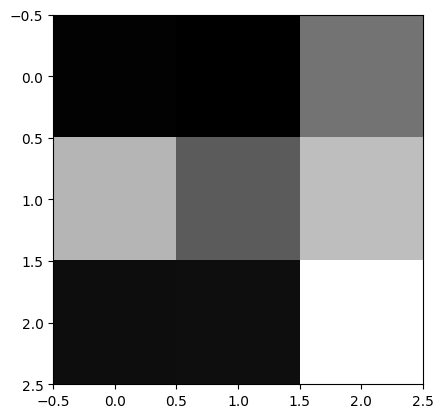

In [3]:
plt.imshow(np.random.random((3,3)),cmap="gray")

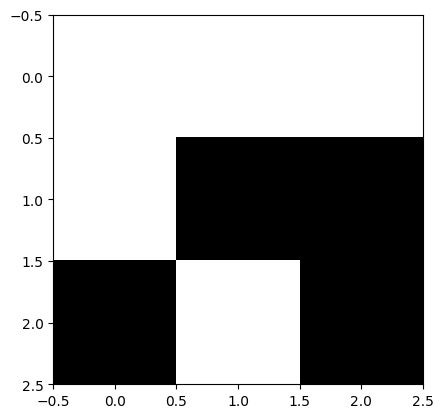

In [4]:
def isValid(img):
    if (img[img==True].shape[0]!=4) and (img[img==True].shape[0]!=5):
        return False,0
    white = 0
    black = 0
    row = np.sum(img*2-1,axis=0)
    col = np.sum(img*2-1,axis=1)
    white += row[row==3].shape[0]
    white += col[col==3].shape[0]
    black += row[row==-3].shape[0]
    black += col[col==-3].shape[0]
    if (img[0][0]==img[1][1] and img[1][1]==img[2][2]):
        if (img[0][0]==1):
            white += 1
        else:
            black += 1
    if (img[0][2]==img[1][1] and img[1][1]==img[2][0]):
        if (img[1][1]==1):
            white += 1
        else:
            black += 1
    return (abs(white+black)==1), white, black


def getImage():
    img = np.astype(np.ceil((np.random.random((3,3)))*2 - 1),np.bool)
    check = isValid(img)
    while (not check[0]):
        img = np.astype(np.ceil((np.random.random((3,3)))*2 - 1),np.bool)
        check = isValid(img)
    return img, (check[1])
plt.imshow(getImage()[0],cmap="gray")

In [14]:
dataset = []
temp = []
for i in range(10000):
    img, winner = getImage()
    if (not any([np.array_equal(a,img) for a in temp])) or len(temp)==0:
        temp.append(img)
        dataset.append((img,winner))
len(dataset)

104

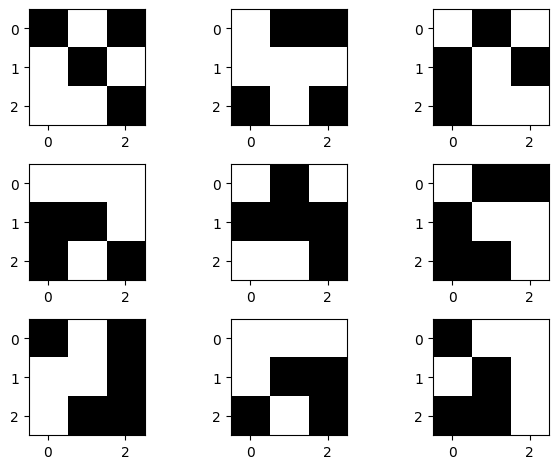

In [15]:
fig, axes = plt.subplots(3, 3)
axes = axes.flatten()
for i in range(9):
    axes[i].imshow(dataset[i][0], cmap="gray")
    # axes[i].label
plt.tight_layout()
plt.show()

In [16]:
from pickle import dump
with open("dataset.obj","wb") as f:
    dump(dataset,f)

0


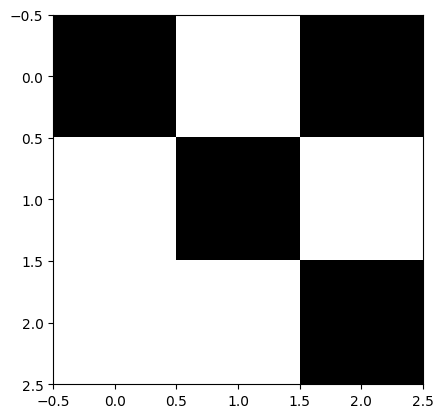

In [17]:
from pickle import load
with open("dataset.obj","rb") as f:
    dataset_loaded = load(f)
plt.imshow(dataset_loaded[0][0],cmap="gray")
print(dataset_loaded[0][1])